## Performing Exploratory Data Analysis (EDA) on `MEDICAL INSURNACE DATASET`

1. Importing Library and Reading the dataset

2. Feature Engineering 

2.1 Numerical Approach

2.2 Visual Approach - 

2.2.1 Univariate Analysis 

2.2.2 Multivariate Analysis 

3. Preprocessing the data

3.1 Data cleaning

3.2 Feature Transformation

3.3 Feature Scaling (Normalization)

4. Conclusion

### 1. Import Library & reading dataset

In [1]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

#DataFrame Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

#Modelin Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [3]:
# # Visualization Plot Settings
# sns.set(rc={'figure.figsize':(15,5)})
# sns.set_style('whitegrid')
# sns.color_palette('viridis')
# plt.style.use('seaborn-bright')

In [4]:
# Read the dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 2. Feature Engineering

In [5]:
# Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [7]:
# Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

#### 2.1 Numeric Approach - Describing the data

In [8]:
#Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
584,19,male,20.700,0,no,southwest,1242.81600,normal
997,63,female,36.850,0,no,southeast,13887.96850,obese
842,23,female,32.780,2,yes,southeast,36021.01120,obese
677,60,male,31.350,3,yes,northwest,46130.52650,obese
873,43,male,30.100,1,no,southwest,6849.02600,obese
1146,60,male,32.800,0,yes,southwest,52590.82939,obese
1214,27,female,31.255,1,no,northwest,3956.07145,obese
470,27,male,32.670,0,no,southeast,2497.03830,obese
1317,18,male,53.130,0,no,southeast,1163.46270,obese
1159,32,female,41.100,0,no,southwest,3989.84100,obese


In [9]:
## Describe Categorical Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [10]:
## Describe Numerical Values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
## Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [12]:
## Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [13]:
## Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [14]:
#Check Children Feature
df.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [15]:
## Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

#### 2.2 Visual Approach

#### 1. Univariate Analysis

#### 1.1 Boxplot

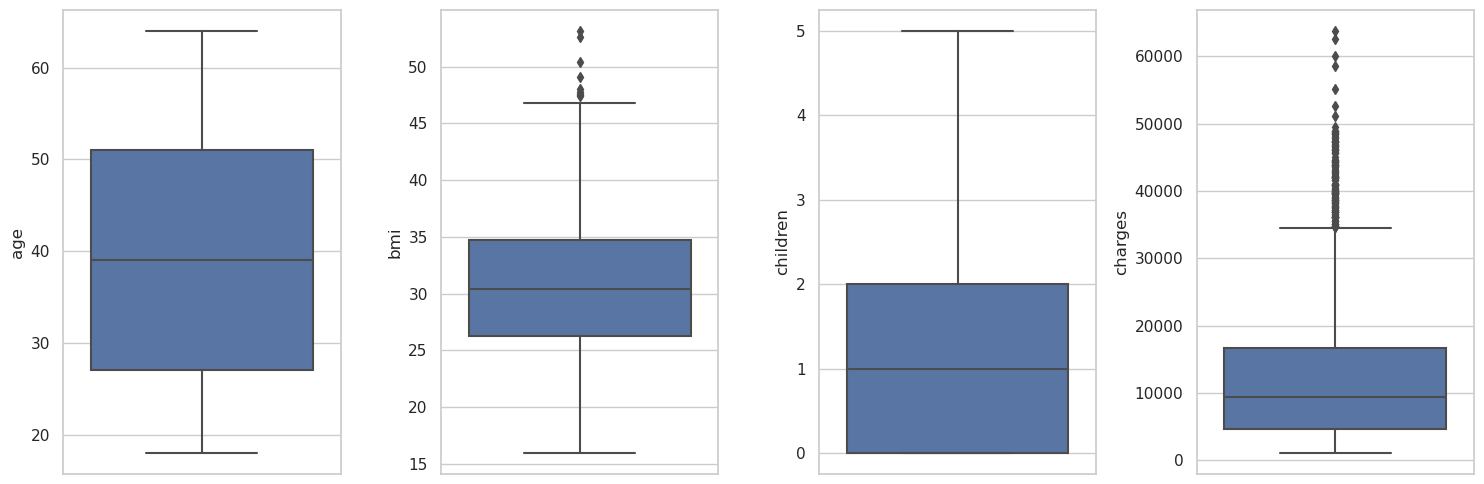

In [16]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

#### 1.2 Kernel Density Estimate (KDE) plot

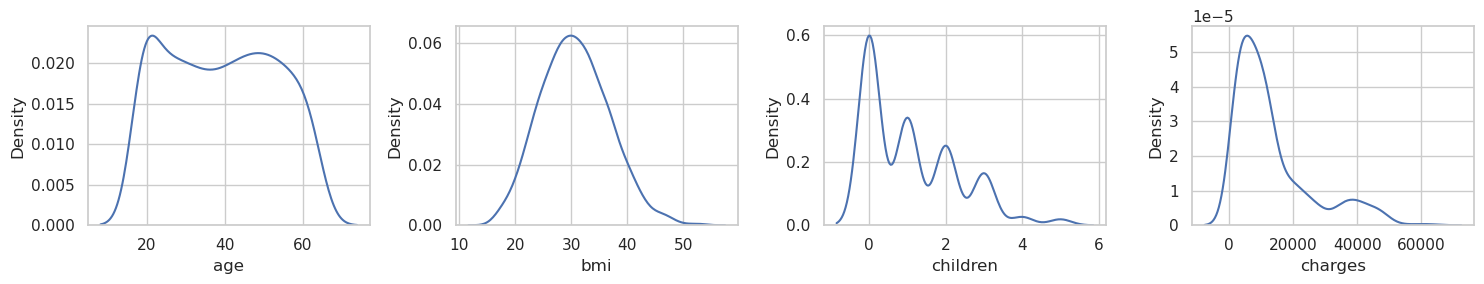

In [17]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

#### 1.3 Histplot

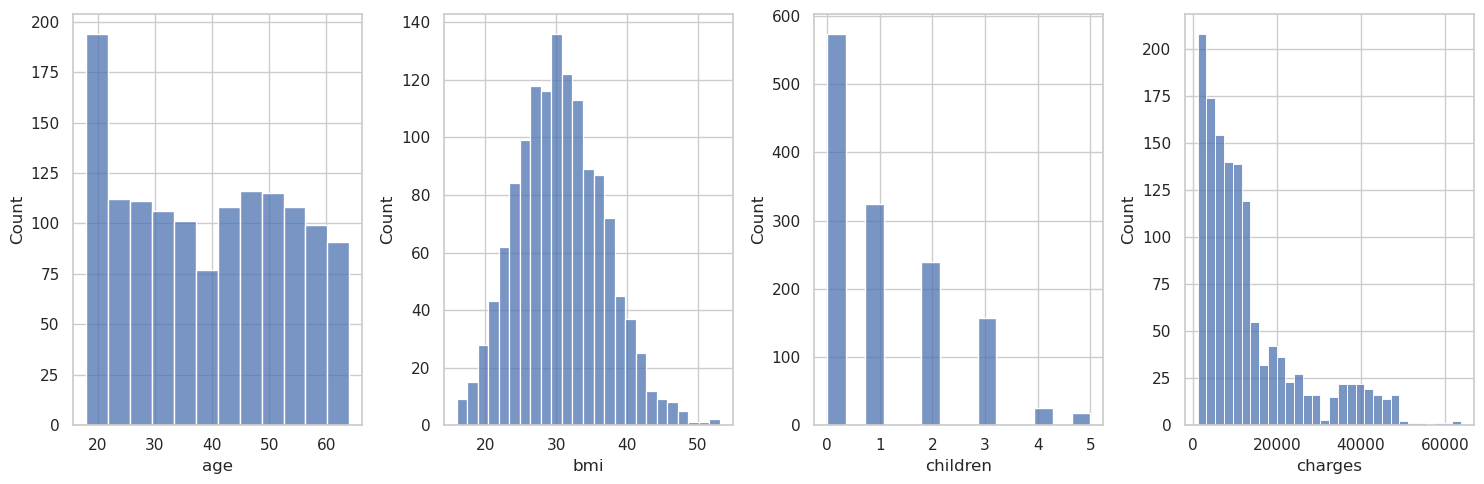

In [18]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

#### 1.4 Countplot

ValueError: could not convert string to float: 'female'

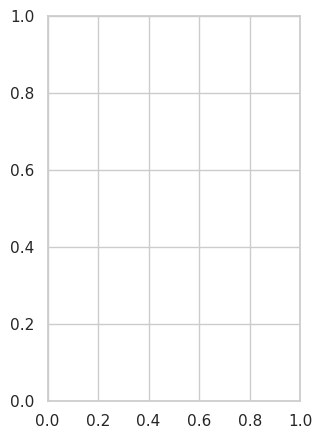

In [19]:
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

#### 2. Multivariate Analysis

#### 2.1 Heatmap

<Axes: >

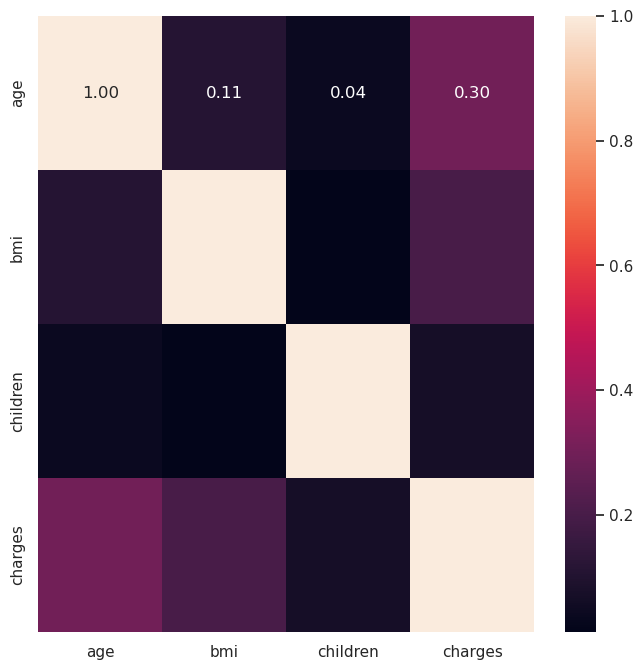

In [20]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### 2.2 Pairplot

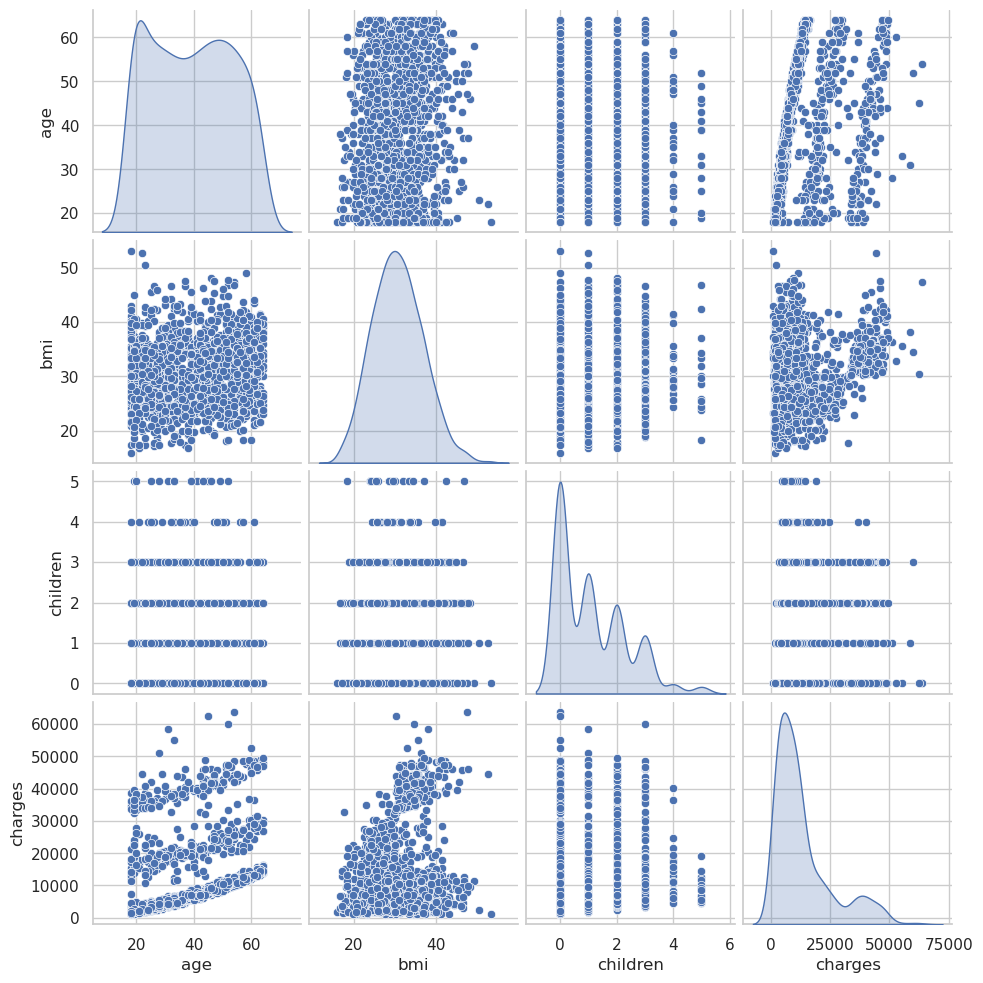

In [21]:
sns.pairplot(df, diag_kind='kde')

#### 2.3 Scatterplot

<Axes: xlabel='bmi', ylabel='charges'>

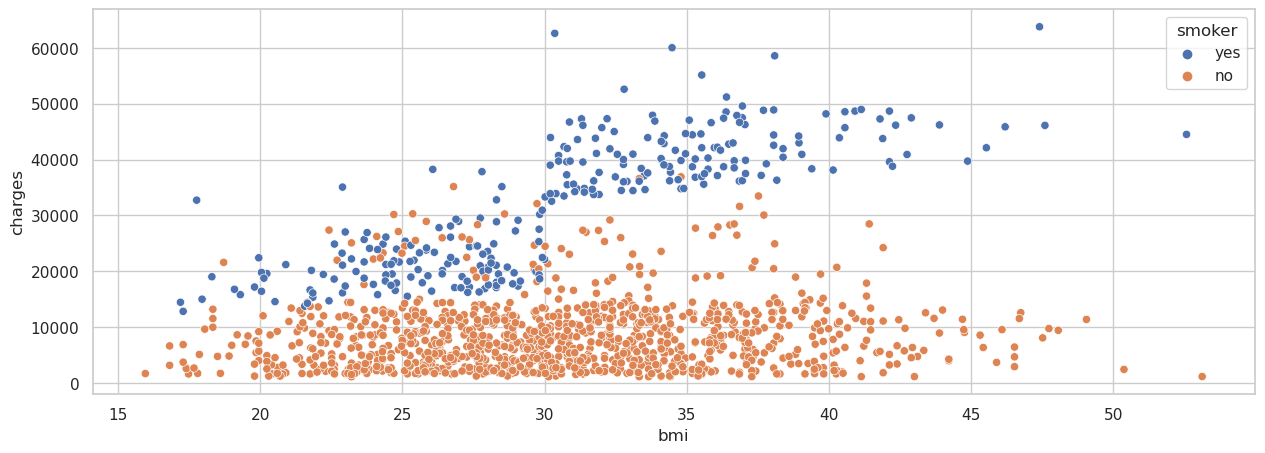

In [22]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

<Axes: xlabel='age', ylabel='charges'>

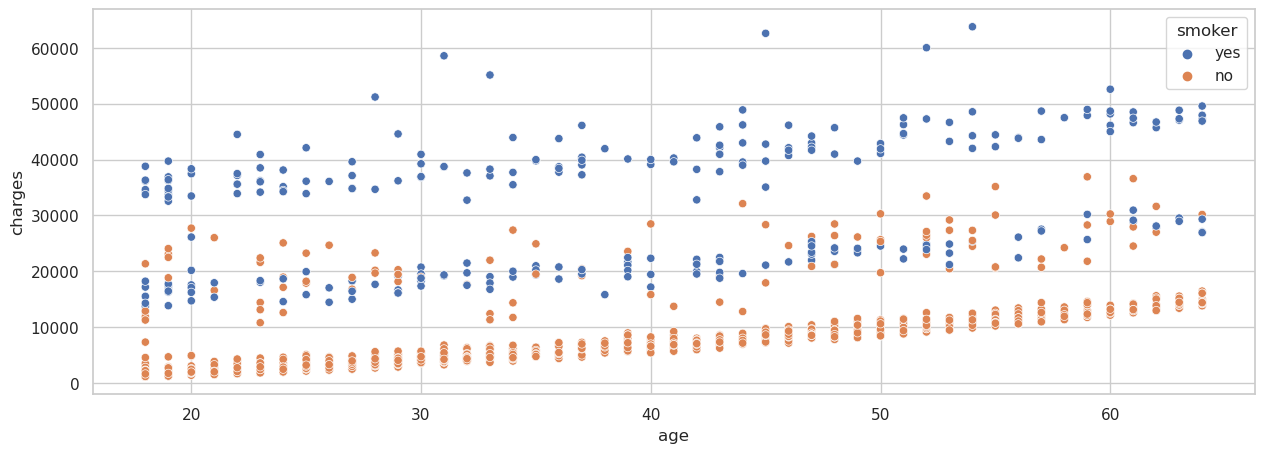

In [23]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

#### 2.4 Barplot

In [25]:
#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<Axes: xlabel='region', ylabel='charges'>

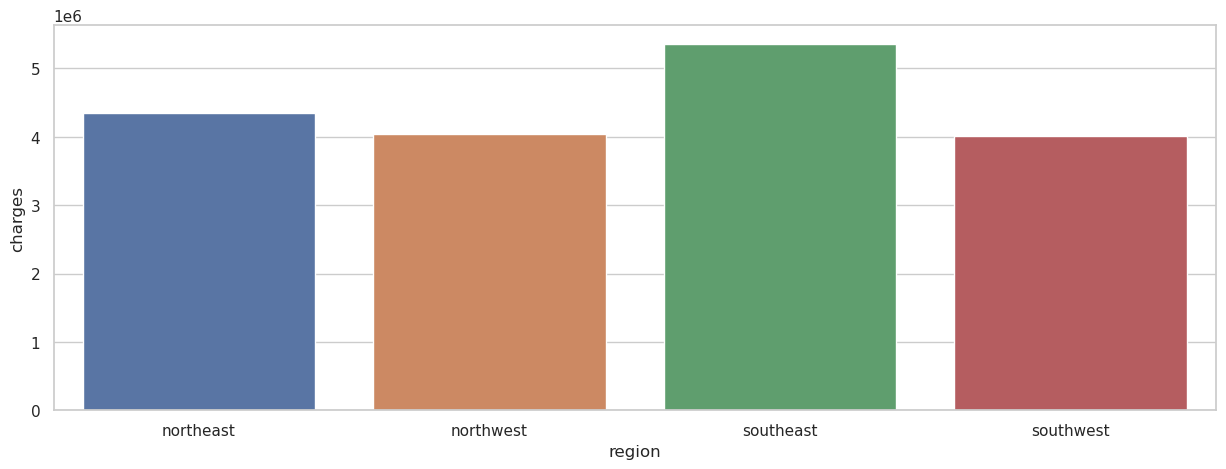

In [26]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

<Axes: xlabel='region', ylabel='charges'>

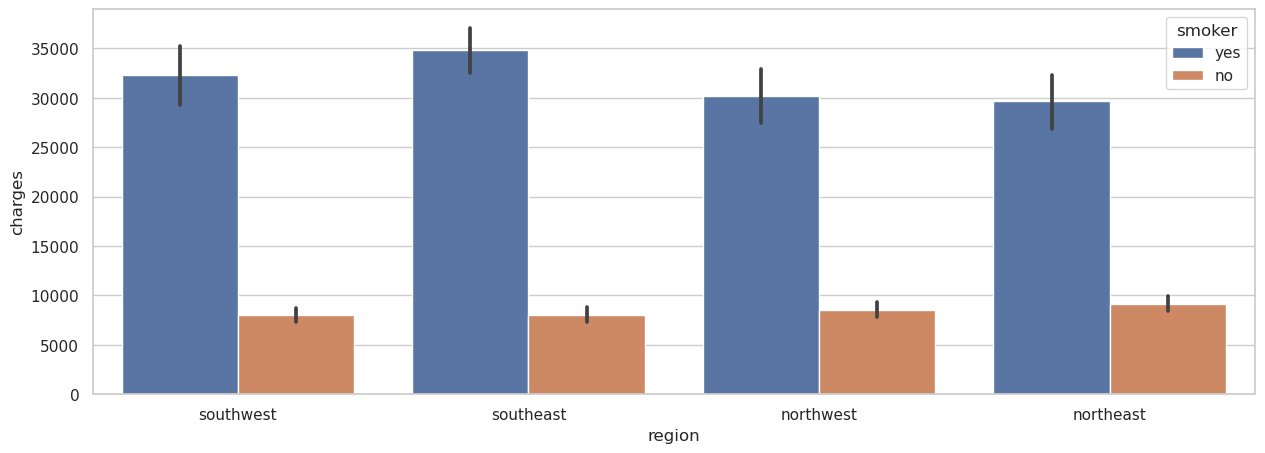

In [28]:
#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

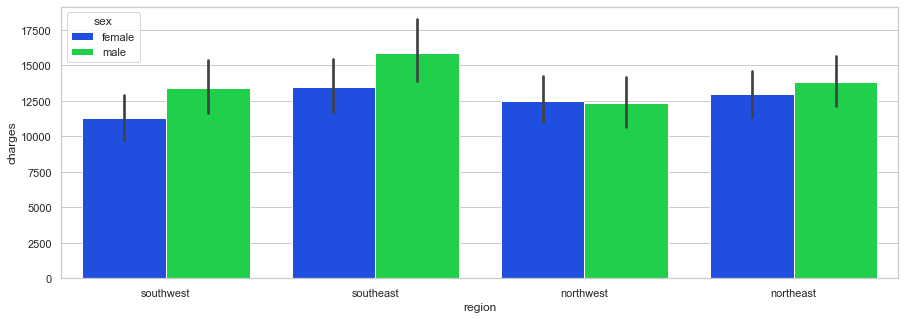

In [27]:
#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [29]:
#Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


<Axes: xlabel='sex', ylabel='count'>

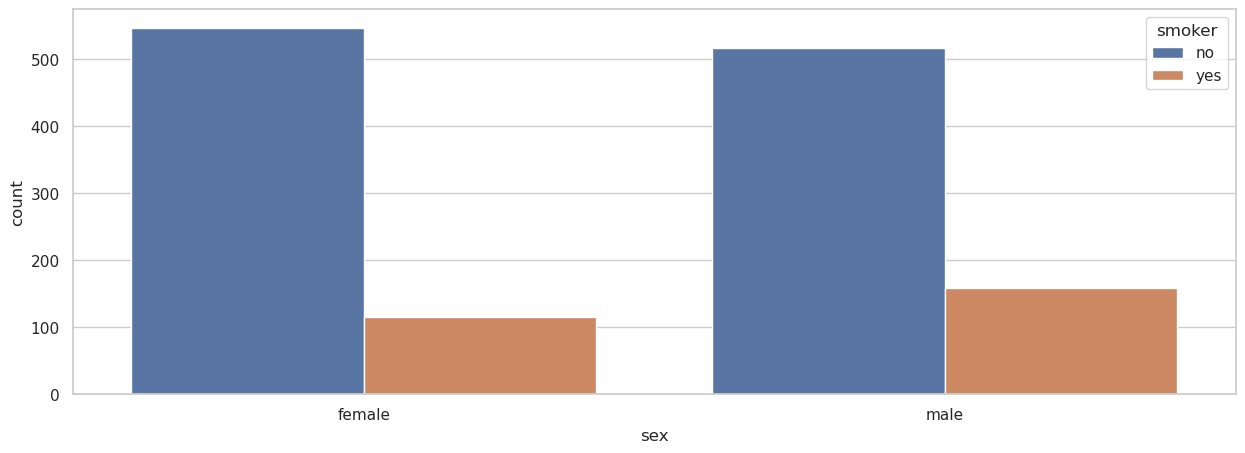

In [30]:
#Barplot Visualization
sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)

<Axes: xlabel='children', ylabel='charges'>

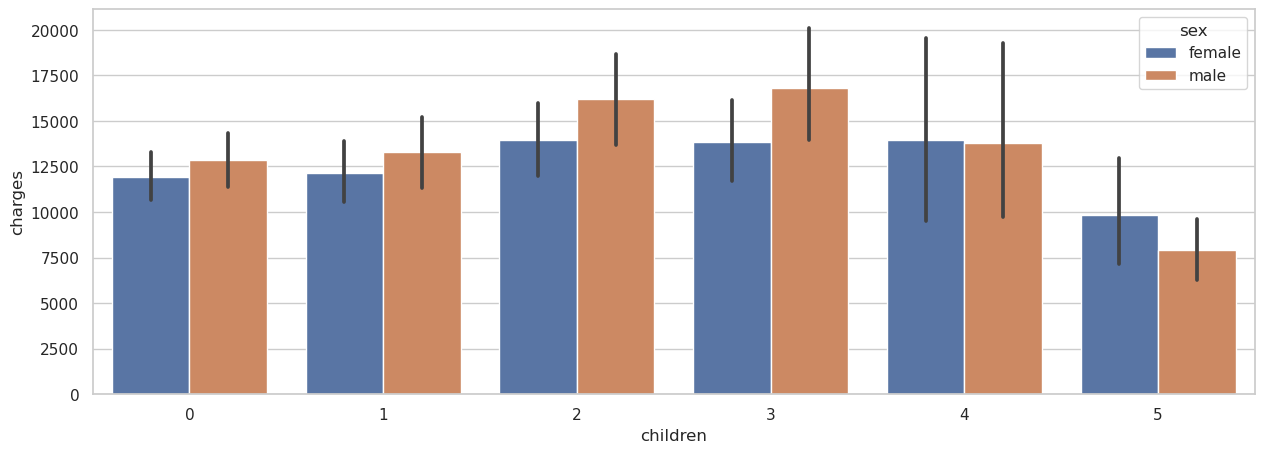

In [31]:
#Barplot with Hue Sex
sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

<Axes: xlabel='children', ylabel='charges'>

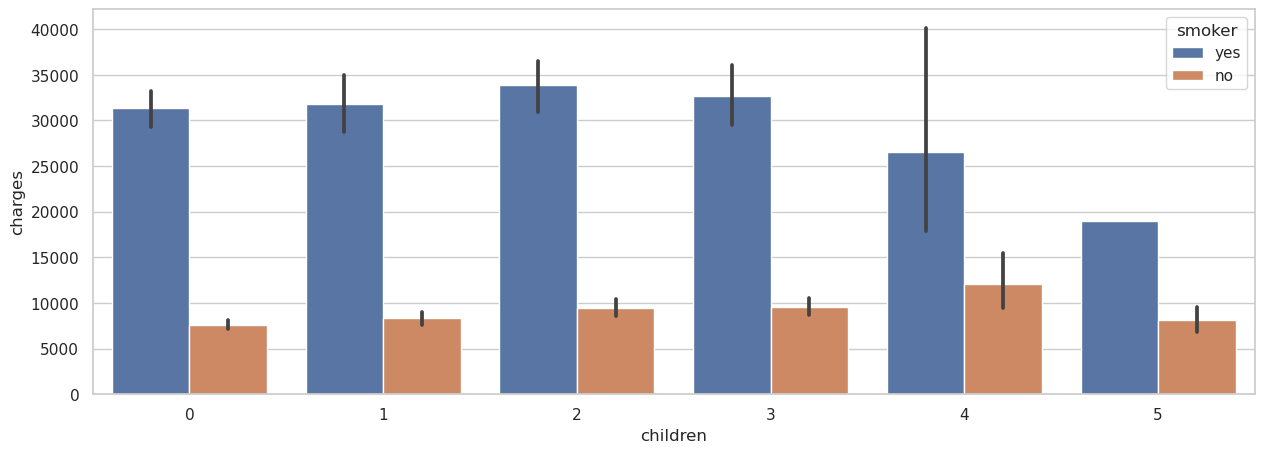

In [33]:
#Barplot with Hue Smoker
sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)

In [34]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


<Axes: xlabel='weight_status', ylabel='count'>

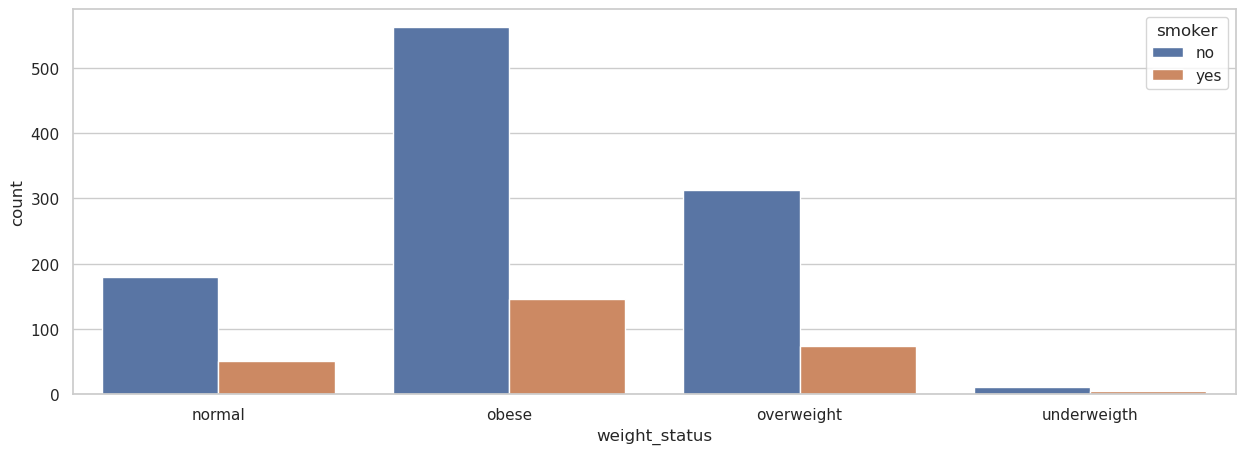

In [35]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [36]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [37]:
#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


<Axes: xlabel='weight_status', ylabel='count'>

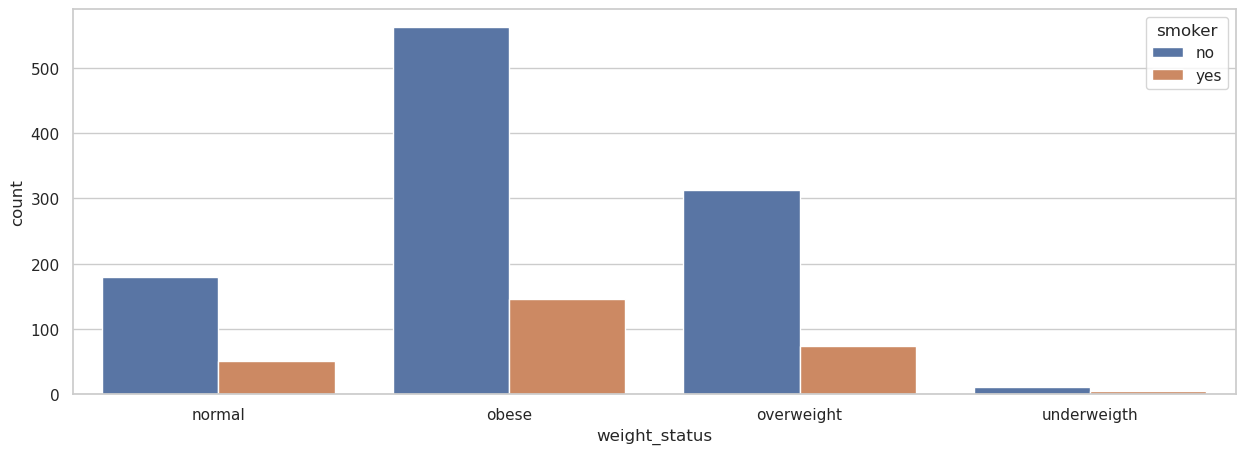

In [38]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [39]:
# Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [40]:
# Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


<Axes: xlabel='weight_status', ylabel='avg_charges'>

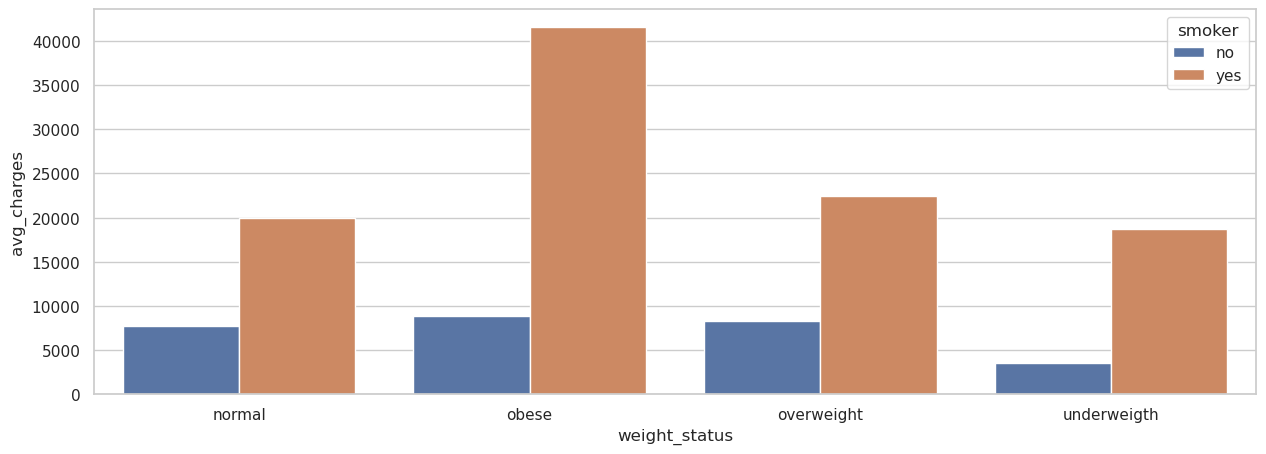

In [41]:
# Average Charges Barplot
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.

### 3. Preprocessing the data (Data cleaning, Feature Transformation, Feature Scaling (Normalization))

#### 3.1 Missing Value

In [42]:
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

There are no missing value

#### 3.2 Duplicate Value

In [43]:
df.duplicated().sum()

1

In [44]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

In [45]:
# Creating a Copy DataFrame
dfori = df.copy()

#### 3.3 Feature Transformation

- Ordinal Encoding
- One hot Encoding
- Feature Encoding

In [46]:
# Ordinal Encoding
dfori['smoker'] = dfori['smoker'].replace({'yes' : 0, 'no' : 1})

# One Hot Encoding
sex_ori = pd.get_dummies(dfori['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfori['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfori['weight_status'], prefix = 'status')

# Concat Feature Encoding
dfori = pd.concat([dfori, sex_ori], axis=1)
dfori = pd.concat([dfori, region_ori], axis=1)
dfori = pd.concat([dfori, status_ori], axis=1)

In [47]:
# Drop Encoded Feature
dfori = dfori.drop(columns = ['sex', 'region', 'weight_status'])

# Check df
dfori.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,1,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1,1725.55230,0,1,0,0,1,0,0,1,0,0
2,28,33.000,3,1,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,1,21984.47061,0,1,0,1,0,0,1,0,0,0
4,32,28.880,0,1,3866.85520,0,1,0,1,0,0,0,0,1,0


In [48]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   uint8  
 6   sex_male            1337 non-null   uint8  
 7   reg_northeast       1337 non-null   uint8  
 8   reg_northwest       1337 non-null   uint8  
 9   reg_southeast       1337 non-null   uint8  
 10  reg_southwest       1337 non-null   uint8  
 11  status_normal       1337 non-null   uint8  
 12  status_obese        1337 non-null   uint8  
 13  status_overweight   1337 non-null   uint8  
 14  status_underweigth  1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.7 K

#### 3.4 Normalization (Feature Scaling)

In [49]:
# Grouping Features for Normalization
norm_ori = dfori.drop(columns = ['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweigth'],
      dtype='object')


In [50]:
# Normalization Features
for i in range(len(norm_ori)):
    dfori[norm_ori[i]] = MinMaxScaler().fit_transform(dfori[norm_ori[i]].values.reshape(len(dfori), 1))

In [51]:
dfori.sample(10)

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
722,0.956522,0.576809,0.0,1.0,12979.35800,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1021,0.086957,0.405165,0.6,0.0,35595.58980,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
276,0.021739,0.125235,0.4,1.0,2803.69785,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
649,0.869565,0.457493,0.0,1.0,12430.95335,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61,0.152174,0.476190,0.8,1.0,4504.66240,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0,0.021739,0.321227,0.0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1084,0.956522,0.391041,0.4,1.0,15019.76005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1065,0.521739,0.251278,0.2,1.0,7045.49900,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
171,0.673913,0.385795,0.0,1.0,8116.68000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
767,0.521739,0.350821,0.2,1.0,7050.64200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### 4. Conclusion

The insights drawn by performing `Exploratory Data Analysis` (EDA) are:

- Most people are a non smokers & obese
- Feature sex, region has an almost balanced amount
- People who smoke & have a higher BMI, has higher medical charges
- Older people who smoke have more expensive charges
- An obese person who smokes have higher charges